In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [142]:
data_seet= pd.read_csv(r'C:\Users\suraj\python\Project_SML\diabetic_data.csv')
df=pd.DataFrame(data_seet)

df=df.replace("?",np.nan)
dropping=df.isnull().sum()[df.isnull().sum()>1]/len(df)*100

df.drop(['weight','payer_code','medical_specialty','encounter_id','patient_nbr'],axis=1,inplace=True)

df.head(5)

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),6,25,1,1,41,0,1,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),1,1,7,3,59,0,18,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),1,1,7,2,44,1,16,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,1,7,1,51,0,8,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [131]:
def Scalling(Data_In):
    scaler = StandardScaler()
    #scaler = MinMaxScaler()
    Data_Features=Data_In
    #Data_Features=pd.DataFrame(Data_In)
    
    Data_objects = Data_Features.select_dtypes(exclude=['int64'])
    Data_Readd = Data_Features['readmitted']   
    Data_Readd = Data_Readd.replace({"NO":0,"<30":1,">30":0})
    Data_Features = Data_Features.drop(['readmitted'],axis=1)
    
    col_list = list(Data_objects.columns)
    for col in col_list:
        Data_Features[col] = pd.Categorical( Data_objects[col])
        Data_Features[col] = Data_Features[col].cat.codes
        
    

        
    #Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    
    Data_Features['readmitted'] = Data_Readd
    
    return Data_Features
    raise NotImplementedError
    
    
    
def ScallingAll(Data_In):
    scaler = StandardScaler()
    Data_Features=Data_In
    #Data_Features=pd.DataFrame(Data_In)
    Data_objects = Data_Features.select_dtypes(exclude=['int64'])
    
    col_list = list(Data_objects.columns)
    for col in col_list:
        Data_Features[col] = pd.Categorical( Data_objects[col])
        Data_Features[col] = Data_Features[col].cat.codes
        
    Data_Features[Data_Features.columns] = scaler.fit_transform(Data_Features)
    
    
    return Data_Features
    raise NotImplementedError

In [145]:
Data_scalled= ScallingAll(df)
Data_scalled.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,0.427557,-0.927397,-3.824600,2.750800,4.031022,-1.169873,-1.137649,-0.106517,-0.785398,-1.848268,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,-1.829868,0.83688
1,0.427557,-0.927397,-3.197277,-0.708461,-0.514312,0.306482,-0.467653,0.808384,-0.785398,0.243390,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,-0.62497
2,-1.703706,-0.927397,-2.569954,-0.708461,-0.514312,0.306482,-0.802651,-1.631351,2.145781,-0.371804,...,0.0,-0.483395,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,0.926591,0.546488,0.83688
3,0.427557,1.078031,-1.942632,-0.708461,-0.514312,0.306482,-0.802651,0.045967,-0.199162,-0.002688,...,0.0,1.900979,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0.83688
4,0.427557,1.078031,-1.315309,-0.708461,-0.514312,0.306482,-1.137649,0.401761,-0.785398,-0.986997,...,0.0,0.708792,-0.081718,-0.011303,-0.003135,-0.004433,-0.003135,-1.079225,0.546488,0.83688


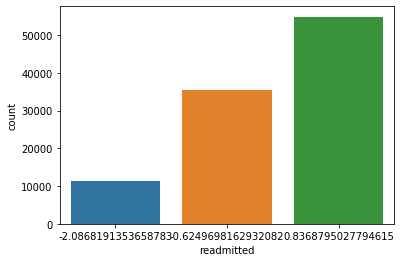

In [146]:
sns.countplot(Data_scalled['readmitted'])

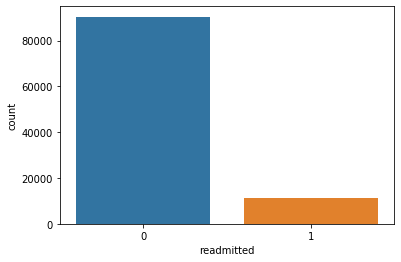

In [144]:
# After Conversion
#'0'=No readmission;
#'<30'=A readmission in less than 30 days (this situation is not good, because maybe your treatment was not appropriate);
#">30"=A readmission in more than 30 days (this one is not so good as well the last one, however, the reason can be the state of the patient.
Data_readmit = Scalling(df)
sns.countplot(Data_readmit['readmitted'])


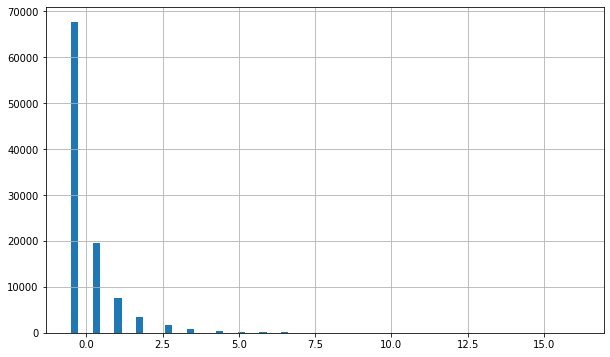

In [147]:
plt.figure(figsize=(10,6))
Data_scalled['number_inpatient'].hist(bins=70)



In [148]:
#Corelation =Data_scalled.corr()
Readmitted_Data = Data_scalled['readmitted']
Correlation = Data_scalled.corrwith(Readmitted_Data)
Corelation.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.055271,0.114684,0.098659,0.005994,0.031173,-0.015324,-0.023033,0.027087,0.027935,...,NaN,-0.029865,0.006656,0.004833,0.001340,-0.012277,0.001340,-0.009325,-0.006367,0.003981
gender,0.055271,1.000000,-0.050535,0.014592,-0.020847,-0.003843,-0.029928,-0.003103,0.059980,-0.022023,...,NaN,0.003435,0.004054,0.006954,-0.002907,0.004779,-0.002907,-0.014905,0.015901,-0.002939
age,0.114684,-0.050535,1.000000,-0.007209,0.114323,0.044696,0.107515,0.020770,-0.030104,0.041847,...,NaN,-0.023173,-0.001306,0.002042,-0.000190,0.002512,-0.000190,0.036019,-0.022601,0.017634
admission_type_id,0.098659,0.014592,-0.007209,1.000000,0.083483,0.106654,-0.012500,-0.143713,0.129888,0.079535,...,NaN,-0.007858,-0.002485,-0.004399,-0.002221,-0.000074,0.002117,-0.007274,-0.000310,-0.011651
discharge_disposition_id,0.005994,-0.020847,0.114323,0.083483,1.000000,0.018193,0.162748,0.023415,0.015921,0.108753,...,NaN,-0.022845,-0.004352,0.000444,-0.001612,-0.000181,-0.000425,0.012307,-0.028887,0.050560


In [149]:
Corelation_R = Corelation['readmitted'].sort_values()
Redd=Corelation_R[(Corelation_R>0.02)]
#Redd

Redd=pd.DataFrame(Redd)
features=list(Redd.transpose().columns)
print(np.size(features))
print('\n')
print(features)

9


['num_lab_procedures', 'diabetesMed', 'num_medications', 'time_in_hospital', 'number_diagnoses', 'discharge_disposition_id', 'number_emergency', 'number_inpatient', 'readmitted']




 ***** Correlation plot of Readmission with MOST INFULENCING FEATURES *****




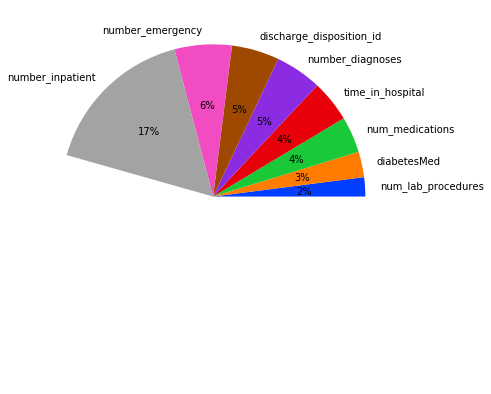

In [150]:
##DATA Visvalization

labels = ['num_lab_procedures', 'diabetesMed', 'num_medications', 'time_in_hospital', 'number_diagnoses', 'discharge_disposition_id', 'number_emergency', 'number_inpatient']
labels = list(labels)
colors = sns.color_palette('bright')[0:8]
#colors = ['yellowgreen', 'lightgreen', 'darkgreen', 'gold', 'red', 'lightsalmon', 'darkred','red']
Data = Redd.drop(['readmitted'], axis =0);
Data =Data['readmitted'];
Data = [Data[0],Data[1],Data[2],Data[3],Data[4],Data[5],Data[6],Data[7]];
fig = plt.figure(figsize =(10, 7))
plt.pie(Data,labels = labels,colors = colors,autopct='%.0f%%')
print('\n')
print(' ***** Correlation plot of Readmission with MOST INFULENCING FEATURES *****')
print('\n')
plt.show()

Text(0.5, 1.0, 'Readmitted vs Num_lab_procedures')

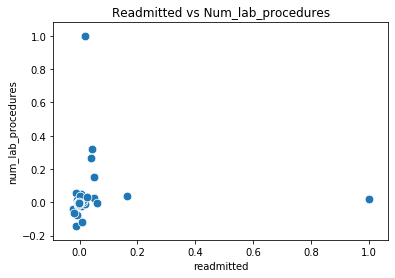

In [22]:
##Each Feature correlation with readmission rate

#1# Readmitted vs Num_lab_procedures

sns.scatterplot(x='readmitted',y='num_lab_procedures',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs Num_lab_procedures')

Text(0.5, 1.0, 'Readmitted vs DiabetesMed')

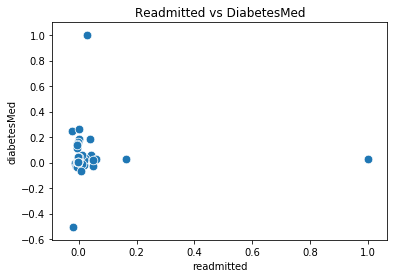

In [23]:
#2# Readmitted vs diabetesMed

sns.scatterplot(x='readmitted',y='diabetesMed',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs DiabetesMed')

Text(0.5, 1.0, 'Readmitted vs Num_medications')

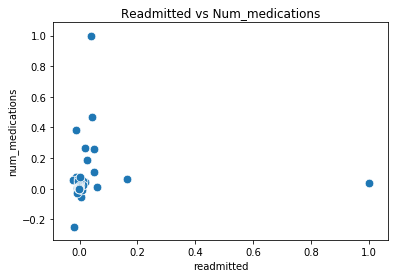

In [24]:
#3# Readmitted vs Num_medications
sns.scatterplot(x='readmitted',y='num_medications',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs Num_medications')

Text(0.5, 1.0, 'Readmitted vs time_in_hospital')

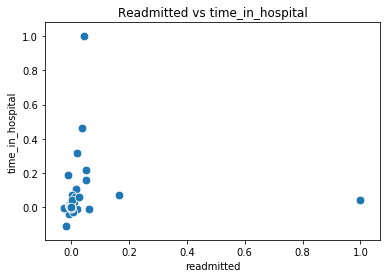

In [25]:
#4# Readmitted vs time_in_hospital
sns.scatterplot(x='readmitted',y='time_in_hospital',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs time_in_hospital')

Text(0.5, 1.0, 'Readmitted vs number_diagnoses')

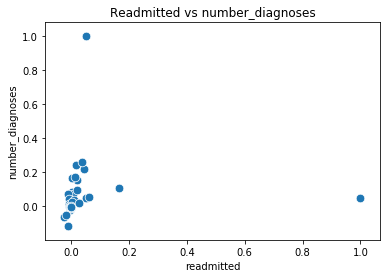

In [26]:
#5# Readmitted vs number_diagnoses
sns.scatterplot(x='readmitted',y='number_diagnoses',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs number_diagnoses')

Text(0.5, 1.0, 'Readmitted vs discharge_disposition_id')

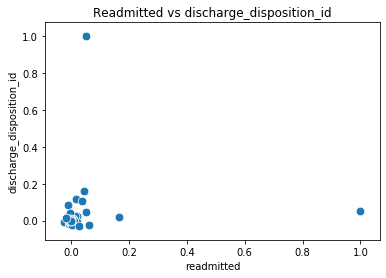

In [27]:
#6# Readmitted vs discharge_disposition_id
sns.scatterplot(x='readmitted',y='discharge_disposition_id',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs discharge_disposition_id')

Text(0.5, 1.0, 'Readmitted vs number_emergency')

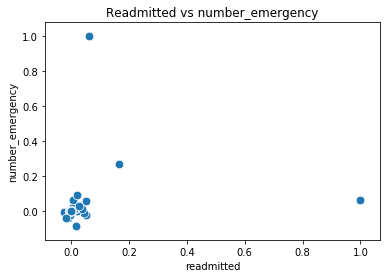

In [28]:
#7# Readmitted vs number_emergency
sns.scatterplot(x='readmitted',y='number_emergency',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs number_emergency')

Text(0.5, 1.0, 'Readmitted vs number_inpatient')

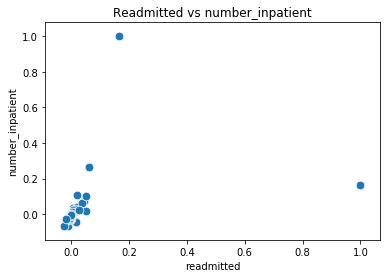

In [29]:

#8# Readmitted vs number_inpatient
sns.scatterplot(x='readmitted',y='number_inpatient',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs number_inpatient')

Text(0.5, 1.0, 'Readmitted vs metformin')

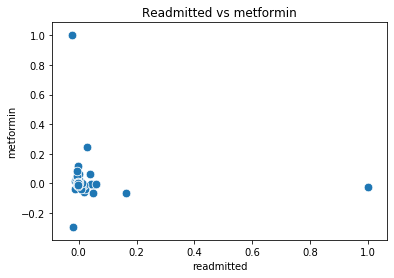

In [152]:
#*# Readmitted vs metformin
sns.scatterplot(x='readmitted',y='metformin',data = Corelation,x_bins=100,y_bins=100,s=75)
plt.title('Readmitted vs metformin')

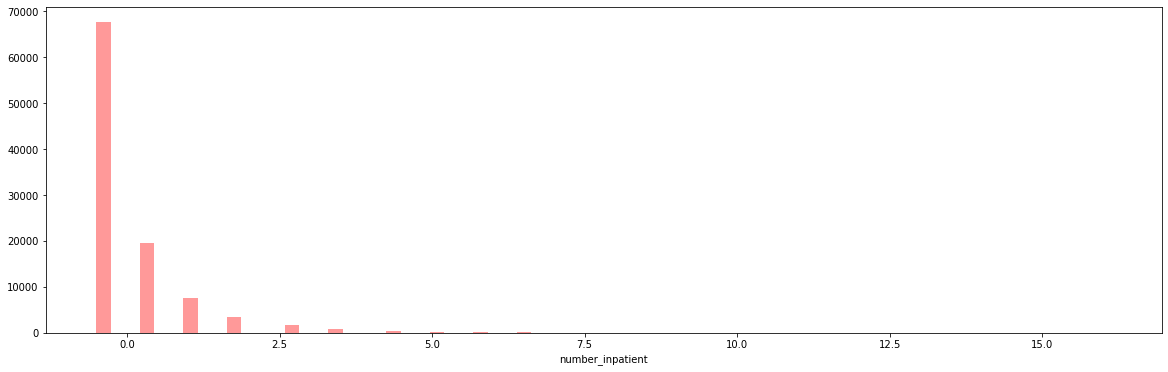

In [111]:
## Visvalization of Most influencing parameter 

plt.figure(figsize=(20,6))
sns.distplot(Data_scalled['number_inpatient'], kde = False, bins = 70,color="r")